In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit 

In [3]:
def retta(x, m, q):
    return m*x + q

def resonance(x, x0, Q, Q_c, phi0):
    num = np.exp(1j*phi0)
    den = 1 + 2*1j*Q*(x-x0)/x0
    return abs(1 - (Q/Q_c)*(num/den))

def fit_func(x,a,b,x0,Q,Q_c,phi0):
    return retta(x,a,b)*resonance(x,x0,Q,Q_c,phi0)

def mod(I,Q):
    return np.sqrt(I**2 + Q**2)

def FWHM(x,y):
    half = max(y) / 2.
    minori = x[np.where(y < half)]
    index1 = min(minori)
    index2 = max(minori)
    return index2 - index1
    

In [4]:
raw_data = list(np.genfromtxt('Resonance02.txt'))

I = []
F = []
Q = []

for i in raw_data:
    F.append(i[0])
    I.append(i[1])
    Q.append(i[2])
I = np.array(I)
F = np.array(F)
Q = np.array(Q)

S21 = mod(I,Q)

In [5]:
width = FWHM(F,S21)
stima_x0 = float(F[np.where(S21 == min(S21))])
stima_Q = stima_x0/(2*width)

In [6]:
stima_m = (S21[0]-S21[-1])/(F[0]-F[-1])
stima_q = S21[0] - stima_m * F[0]
stima_Q_c = 10000
stima_phi0 = 0.2

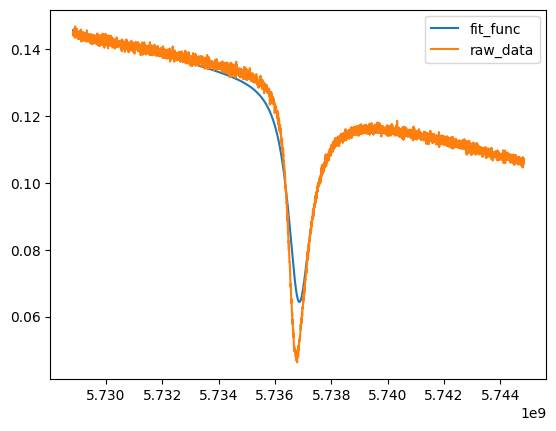

In [7]:
plt.plot(F,fit_func(F,stima_m, stima_q,stima_x0,stima_Q,stima_Q_c,stima_phi0),label='fit_func')
plt.plot(F,S21, label='raw_data')
plt.legend()

In [8]:
params = np.array([stima_m,stima_q,stima_x0,stima_Q, stima_Q_c,stima_phi0]) 
popt, pcov = curve_fit(fit_func,F,S21, params)

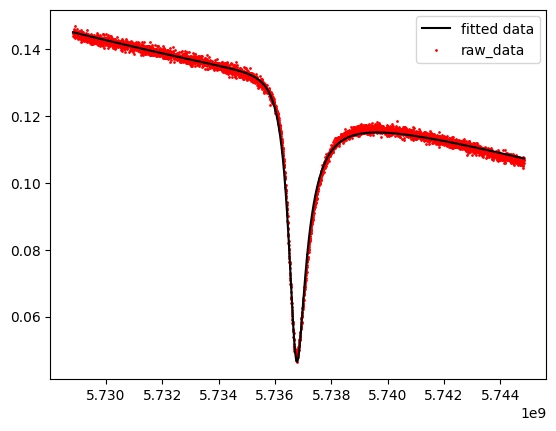

In [9]:
plt.plot(F,fit_func(F, *popt),label='fitted data', color='black')
plt.scatter(F,S21, label='raw_data', s=1, color='red')
plt.legend()

In [22]:
from iminuit import Minuit
from iminuit.cost import UnbinnedNLL
from scipy.stats import norm


# Negative unbinned log-likelihood, you can write your own
cost = UnbinnedNLL((F,S21) , fit_func)

m = Minuit(cost, a = stima_m, b = stima_q,x0 = stima_x0, Q = stima_Q, Q_c = stima_Q_c,phi0 = stima_phi0)
m.limits["Q_c"] = (0, np.inf)
m.migrad()  # find minimum
m.hesse()   # compute uncertainties

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -1.513e+06                 │             Nfcn = 1003              │
│ EDM = 0.299 (Goal: 0.0002)       │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │   ABOVE EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│           Hesse FAILED           │       Covariance NOT pos. def.       │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │ 1.3847e31 │ 0.0000e31 │            │            │         │         │       │
│ 1 │ b    │ 8.1415e40 │ 0.0000e40 │            │            │         │         │       │
│ 2 │ x0   │ 5.4656e37 │ 0.0000e37 │            │            │         │         │       │
│ 3 │ Q    │-7.3629e44 │ 0.0000e44 │            │            │         │         │       │
│ 4 │ Q_c  │ 6.3991e45 │ 0.0000e45 │            │            │    0    │         │       │
│ 5 │ phi0 │-2.8009e42 │ 0.0000e42 │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘